In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR

In [2]:
area_list = [str(i) for i in range(81)]
area_one_length = 9

In [3]:
READ_FILE = 'next_move_area_remove_origin'

In [4]:
from collections import namedtuple
ARGS_FOR_LIST = namedtuple('FOR_LIST', ('dir', 'ratio', 'seed', 'csv'))

def get_for_list():
    dir_list = ['p10000', 'p20000', 'p30000']
    ratio_list = ['r4', 'r5', 'r6']
    seed_list = ['s'+str(123 + i) for i in range(1)]
    csv_list = ['census', 'mobile', 'od']

    return ARGS_FOR_LIST(dir_list, ratio_list, seed_list, csv_list)

In [5]:
def get_read_path(name):
    path = '/Users/kessapassa/OneDrive/research_log/20190402/' + name + '/'
    return path

def get_file_name(args):
    return args.dir + args.ratio + args.seed + '_' + args.csv + '.csv'

def get_full_path(name, args):
    return get_read_path(name) + get_file_name(args)

In [6]:
def get_full_area_path(name, args, area):
    return get_read_path(name) + args.dir + args.ratio + args.seed + '_' + args.csv + area + '.csv'

In [7]:
def for_default_init(func, array):
    for_list = get_for_list()
    
    for _dir in for_list.dir:
        array[_dir] = {}
        
        for _ratio in for_list.ratio:
            array[_dir][_ratio] = {}
            
            for _seed in for_list.seed:
                array[_dir][_ratio][_seed] = {}
                
                for _csv in for_list.csv:
                    array[_dir][_ratio][_seed][_csv] = {}
                    args = ARGS_FOR_LIST(_dir, _ratio, _seed, _csv)
                    func(args, array)

In [8]:
def for_default(func):
    for_list = get_for_list()  
    for _dir in for_list.dir:
        for _ratio in for_list.ratio:
            for _seed in for_list.seed:
                for _csv in for_list.csv:
                    args = ARGS_FOR_LIST(_dir, _ratio, _seed, _csv)
                    func(args)

In [9]:
def create_base_dataframe():
    df = pd.DataFrame(columns=(['{0:02d}'.format(i*10) for i in range(area_one_length)]))
    return df

In [10]:
create_base_dataframe()

,00,10,20,30,40,50,60,70,80


In [11]:
# エリア番号を線形的な数から、iとjで回した数のようにする
def convert_area_to_contour(base, read):
    for r in np.asanyarray(read):
        area_id = int(r[0])
        row = str(area_id // area_one_length)
        col = str(area_id % area_one_length) + '0'
        base.loc[row, col] = r[1]
        
    return base

In [12]:
def area_to_contour(area_id):
    area_id = int(area_id)
    left = str(area_id // area_one_length)
    right = str(area_id % area_one_length) + '0'
    return left+right

In [13]:
base = create_base_dataframe()

csv_array = {}
def main(args, array):
    for _area in area_list:
        df = pd.read_csv(get_full_area_path(READ_FILE, args, _area),
                         encoding='Shift_JISx0213')
        df = convert_area_to_contour(base.copy(), df.copy())
    #                 df = df / df.sum().sum()
        df = df.sort_index(ascending=False)
        df.fillna(0, inplace=True)

        _area = area_to_contour(_area)
        array[args.dir][args.ratio][args.seed][args.csv][_area]= df
        
for_default_init(main, csv_array)

In [14]:
def create_contour(df):
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.０f', cmap='RdYlGn_r',
               vmax=df.sum().mean())

In [15]:
people = 'p30000'
ratio = 'r6'
seed = 's123'
csv = 'census'

In [16]:
df_area_sum = pd.DataFrame(columns=['area', 'sum'])
for _area in [area_to_contour(i) for i in area_list]:
    df = pd.DataFrame([_area, csv_array[people][ratio][seed][csv][_area].sum().sum()], index=['area', 'sum']).T
    df_area_sum = pd.concat([df_area_sum, df])
df_area_sum.reset_index(drop=True, inplace=True)
df_area_sum = df_area_sum[df_area_sum['sum'] > 0]
df_area_sum = df_area_sum.sort_values(by=['sum'], ascending=False)
df_area_sum.head()

,area,sum
40,440,3629
49,540,2751
50,550,2398
41,450,1137
58,640,1026


In [17]:
df_area_sum['sum'].sum()

15853.0

In [18]:
# diff1_array = []
# diff2_array = []
# target_array = []
# od_array = []

# for _area in area_list:
#     _area = area_to_contour(_area)
    
#     target = csv_array[people][ratio][seed][csv][_area].copy()
#     od = csv_array[people][ratio][seed]['od'][_area].copy()
    
#     if (target.sum().sum() > 0) and (od.sum().sum() > 0):
#         diff1 = target / od
#         diff2 = od / target
#         diff1 = diff1.replace(np.inf,np.nan).fillna(0)
#         diff2 = diff2.replace(np.inf,np.nan).fillna(0)
        
#         diff1_array.append(diff1.mean().mean())
#         diff2_array.append(diff2.mean().mean())
#         target_array.append(target.mean().mean())
#         od_array.append(od.mean().mean())
# #         print(_area)
# #         print(diff1.mean().mean())
# #         print(diff2.mean().mean())

In [19]:
# from sklearn.metrics import r2_score

# trainX = target_array
# trainY = od_array

# # plt.figure(figsize=(9,6), dpi=600)
# plt.plot(trainX, trainY, 'o')
# order=2
# sns.regplot(x=trainX, y=trainY, order=order, ci=0)
# z = np.polyfit(trainX, trainY, order)
# z = np.squeeze(z)
# p = np.poly1d(z)
# print('y = ', p)
# print('相関 = ', np.corrcoef(trainX, trainY)[0,1])
# print('R^2 = ', r2_score(trainX, trainY))

In [20]:
csv_array_2d = {}
def create2d(args, array):
    for _area in area_list:
        df = pd.read_csv(get_full_area_path(READ_FILE, args, _area),
                         encoding='Shift_JISx0213')
        _area = area_to_contour(_area)
        array[args.dir][args.ratio][args.seed][args.csv][_area] = df
        
for_default_init(create2d, csv_array_2d)

In [21]:
from sklearn.linear_model import LinearRegression as LR
def show_score(x, y):
    x = x.values.reshape(-1, 1)
    y = y.values.reshape(-1, 1)
    model = LR()
    model.fit(x, y)
    score = model.score(x, y)
    print(score)
    
    return x, y

In [22]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import PolynomialFeatures

score_array = []
def create_score2d(x, y):
    x = x.values.reshape(-1, 1)
    y = y.values.reshape(-1, 1)
    
    quadratic = PolynomialFeatures(degree = 2)
    X_quad = quadratic.fit_transform(x)
    X_fit = np.arange(trainX.min(), trainX.max(), 1)[:, np.newaxis]
    model = LR()

    # 2次の項を追加、予測値、R^2を評価
    mod_quad = model.fit(X_quad, y)
    y_quad_fit = mod_quad.predict(quadratic.fit_transform(X_fit))
    r2_quad = model.score(X_quad, y)

    # plt.figure(dpi=600)
    plt.scatter(x, y)
    plt.plot(X_fit, y_quad_fit, 'orange')
    print(r2_quad)
    score_array.append(r2_quad)

440 相関:  0.018 | R^2  0.0 | 平均:  44.802


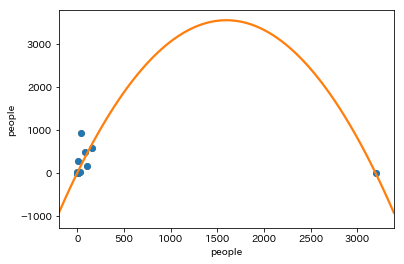

In [23]:
_area = '440'
target = csv_array_2d[people][ratio][seed][csv][_area].copy()
od = csv_array_2d[people][ratio][seed]['od'][_area].copy()

trainX = target['people']
trainY = od['people']
#     plt.figure(figsize=(9,6), dpi=600)
mean_array = []

corr = np.corrcoef(trainX, trainY)[0,1]
if (np.isnan(corr) == False):

    plt.plot(trainX, trainY, 'o')
    order=2
    sns.regplot(x=trainX, y=trainY, order=order, ci=0)
    z = np.polyfit(trainX, trainY, order)
    z = np.squeeze(z)
    p = np.poly1d(z)
#         print('y = ', p)

    trainX = trainX.values.reshape(-1, 1)
    trainY = trainY.values.reshape(-1, 1)
    model = LR()
    model.fit(trainX, trainY)
    score = model.score(trainX, trainY)

    if score >= 0 :
        mean = trainX.mean().mean()
        mean_array.append(mean)
        print(_area, '相関: ', round(corr, 3),  '| R^2 ', round(score, 3), '| 平均: ', round(mean, 3))

エリア 440 : 平均人数 44.80246913580247
0.49319186599942394


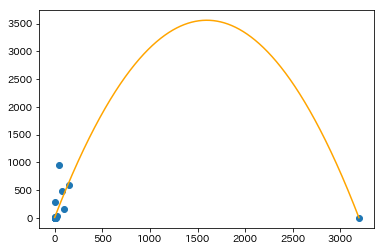

In [24]:
_area = '440'
target = csv_array_2d[people][ratio][seed][csv][_area].copy()
od = csv_array_2d[people][ratio][seed]['od'][_area].copy()
trainX = target['people']
trainY = od['people']


corr = np.corrcoef(trainX, trainY)[0,1]
if (np.isnan(corr) == False) and trainX.mean() >= 5:
    print('エリア', _area, ': 平均人数', trainX.mean())
    create_score2d(trainX, trainY)

エリア 110 : 平均人数 0.024691358024691357
0.00031645569620253333
エリア 120 : 平均人数 0.12345679012345678
0.8274305174298455
エリア 130 : 平均人数 0.30864197530864196
0.8121014014801284
エリア 200 : 平均人数 0.20987654320987653
0.005210818469333689
エリア 210 : 平均人数 3.691358024691358
0.010324345673516477
エリア 220 : 平均人数 0.1111111111111111
0.47724301861702095
エリア 230 : 平均人数 1.8271604938271604
0.7313278178093146
エリア 240 : 平均人数 0.4691358024691358


/Users/kessapassa/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= st

0.00030856810722124095
エリア 310 : 平均人数 0.8395061728395061
0.784779851060845
エリア 320 : 平均人数 4.506172839506172
0.4976997991199893
エリア 330 : 平均人数 9.222222222222221
0.35419737443364796
エリア 340 : 平均人数 10.25925925925926
0.7268227688039389
エリア 360 : 平均人数 0.14814814814814814
0.039355992844365306
エリア 410 : 平均人数 0.4567901234567901
0.0009670151144466342
エリア 420 : 平均人数 0.5555555555555556
0.6805606882777293
エリア 430 : 平均人数 1.9259259259259258
0.79966011680992
エリア 440 : 平均人数 44.80246913580247
0.49319186599942394
エリア 450 : 平均人数 14.037037037037036
0.8148356492594104
エリア 460 : 平均人数 0.691358024691358
0.5661450857860009
エリア 520 : 平均人数 0.9382716049382716
0.43934752512076175
エリア 530 : 平均人数 1.7160493827160495
0.8655738982876379
エリア 540 : 平均人数 33.96296296296296
0.9901822409131007
エリア 550 : 平均人数 29.604938271604937
0.8956126144024064
エリア 560 : 平均人数 0.037037037037037035
0.0946745562130179
エリア 620 : 平均人数 0.8641975308641975
0.49532651997018873
エリア 630 : 平均人数 1.654320987654321
0.33138780143183344
エリア 640 : 平均人数 12.66

/Users/kessapassa/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= st

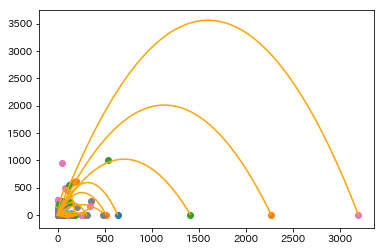

In [25]:
# _area = '440'
for _area in area_list:
    _area = area_to_contour(_area)
    target = csv_array_2d[people][ratio][seed][csv][_area].copy()
    od = csv_array_2d[people][ratio][seed]['od'][_area].copy()
    trainX = target['people']
    trainY = od['people']
    
    
    corr = np.corrcoef(trainX, trainY)[0,1]
    if (np.isnan(corr) == False) and trainX.mean() >= 0:
        print('エリア', _area, ': 平均人数', trainX.mean())
        create_score2d(trainX, trainY)

110 相関:  -0.018 | R^2  0.0 | 平均:  0.025
120 相関:  0.626 | R^2  0.391 | 平均:  0.123
130 相関:  0.41 | R^2  0.168 | 平均:  0.309
200 相関:  0.031 | R^2  0.001 | 平均:  0.21
210 相関:  -0.012 | R^2  0.0 | 平均:  3.691
220 相関:  0.386 | R^2  0.149 | 平均:  0.111
230 相関:  0.168 | R^2  0.028 | 平均:  1.827
240 相関:  -0.018 | R^2  0.0 | 平均:  0.469
310 相関:  0.816 | R^2  0.666 | 平均:  0.84
320 相関:  0.667 | R^2  0.444 | 平均:  4.506
330 相関:  0.039 | R^2  0.002 | 平均:  9.222
340 相関:  0.259 | R^2  0.067 | 平均:  10.259
360 相関:  0.004 | R^2  0.0 | 平均:  0.148
410 相関:  -0.027 | R^2  0.001 | 平均:  0.457
420 相関:  0.659 | R^2  0.434 | 平均:  0.556
430 相関:  0.257 | R^2  0.066 | 平均:  1.926
440 相関:  0.018 | R^2  0.0 | 平均:  44.802
450 相関:  0.642 | R^2  0.413 | 平均:  14.037
460 相関:  0.746 | R^2  0.556 | 平均:  0.691
520 相関:  0.077 | R^2  0.006 | 平均:  0.938
530 相関:  0.511 | R^2  0.261 | 平均:  1.716
540 相関:  0.094 | R^2  0.009 | 平均:  33.963
550 相関:  0.34 | R^2  0.115 | 平均:  29.605
560 相関:  0.308 | R^2  0.095 | 平均:  0.037
620 相関:  0.166 | R^2 

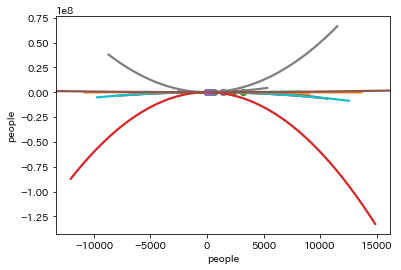

In [26]:
# plt.figure(figsize=(9,6), dpi=600)
mean_array = []

from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

for _area in area_list:
    _area = area_to_contour(_area)
    target = csv_array_2d[people][ratio][seed][csv][_area].copy()
    od = csv_array_2d[people][ratio][seed]['od'][_area].copy()

    trainX = target['people']
    trainY = od['people']
#     plt.figure(figsize=(9,6), dpi=600)

    corr = np.corrcoef(trainX, trainY)[0,1]
#     r2 = r2_score(trainX, trainY)
    if (np.isnan(corr) == False):

        plt.plot(trainX, trainY, 'o')
        order=2
        sns.regplot(x=trainX, y=trainY, order=order, ci=0)
        z = np.polyfit(trainX, trainY, order)
        z = np.squeeze(z)
        p = np.poly1d(z)
    #         print('y = ', p)
    
        trainX = trainX.values.reshape(-1, 1)
        trainY = trainY.values.reshape(-1, 1)
        model = LR()
        model.fit(trainX, trainY)
        score = model.score(trainX, trainY)

        if score >= 0 :
            mean = trainX.mean().mean()
            mean_array.append(mean)
            print(_area, '相関: ', round(corr, 3),  '| R^2 ', round(score, 3), '| 平均: ', round(mean, 3))
            
    #         plt.savefig('{0}_mobile_include_id.png'.format(_area))

mean = 0
for i in mean_array:
    mean += i
print('平均: ', mean / len(mean_array))

In [27]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import PolynomialFeatures

def show_score2d(array, x, y):
    x = x.values.reshape(-1, 1)
    y = y.values.reshape(-1, 1)
    
    quadratic = PolynomialFeatures(degree = 2)
    X_quad = quadratic.fit_transform(x)
    X_fit = np.arange(trainX.min(), trainX.max(), 1)[:, np.newaxis]
    model = LR()

    # 2次の項を追加、予測値、R^2を評価
    mod_quad = model.fit(X_quad, y)
    y_quad_fit = mod_quad.predict(quadratic.fit_transform(X_fit))
    r2_quad = model.score(X_quad, y)

    array.append(r2_quad)

In [28]:
import warnings
warnings.filterwarnings('ignore')
score_array = {}

for_list = get_for_list()  
for _dir in for_list.dir:
    score_array[_dir] = {}
    for _ratio in for_list.ratio:
        score_array[_dir][_ratio] = {}
        for _seed in for_list.seed:
            score_array[_dir][_ratio][_seed] = []
            for _area in area_list:
                _area = area_to_contour(_area)
                target = csv_array_2d[_dir][_ratio][_seed]['census'][_area].copy()
                od = csv_array_2d[_dir][_ratio][_seed]['od'][_area].copy()

                trainX = target['people']
                trainY = od['people']

                corr = np.corrcoef(trainX, trainY)[0,1]
                if (np.isnan(corr) == False) and trainX.mean() >= 0:
#                     print('エリア', _area, ': 平均人数', trainX.mean())
                    show_score2d(score_array[_dir][_ratio][_seed], trainX, trainY)

In [29]:
people = 'p10000'
ratio = 'r4'
seed = 's123'

In [30]:
pd.Series(score_array[people][ratio][seed]).mean()

0.46556615659539896

In [31]:
pd.Series(score_array[people][ratio][seed]).median()

0.4937905584041018

In [32]:
def create_all_counter(area):
    df = csv_array[people][ratio][seed].copy()
    mobile = df['mobile'][area].copy()
    census = df['census'][area].copy()
    od = df['od'][area].copy()
    
    print(mobile.sum().sum())
    print(census.sum().sum())
    print(od.sum().sum())
    
    create_contour(mobile)
    create_contour(census)
    create_contour(od)

# コンター図

496.0


<Figure size 648x432 with 0 Axes>

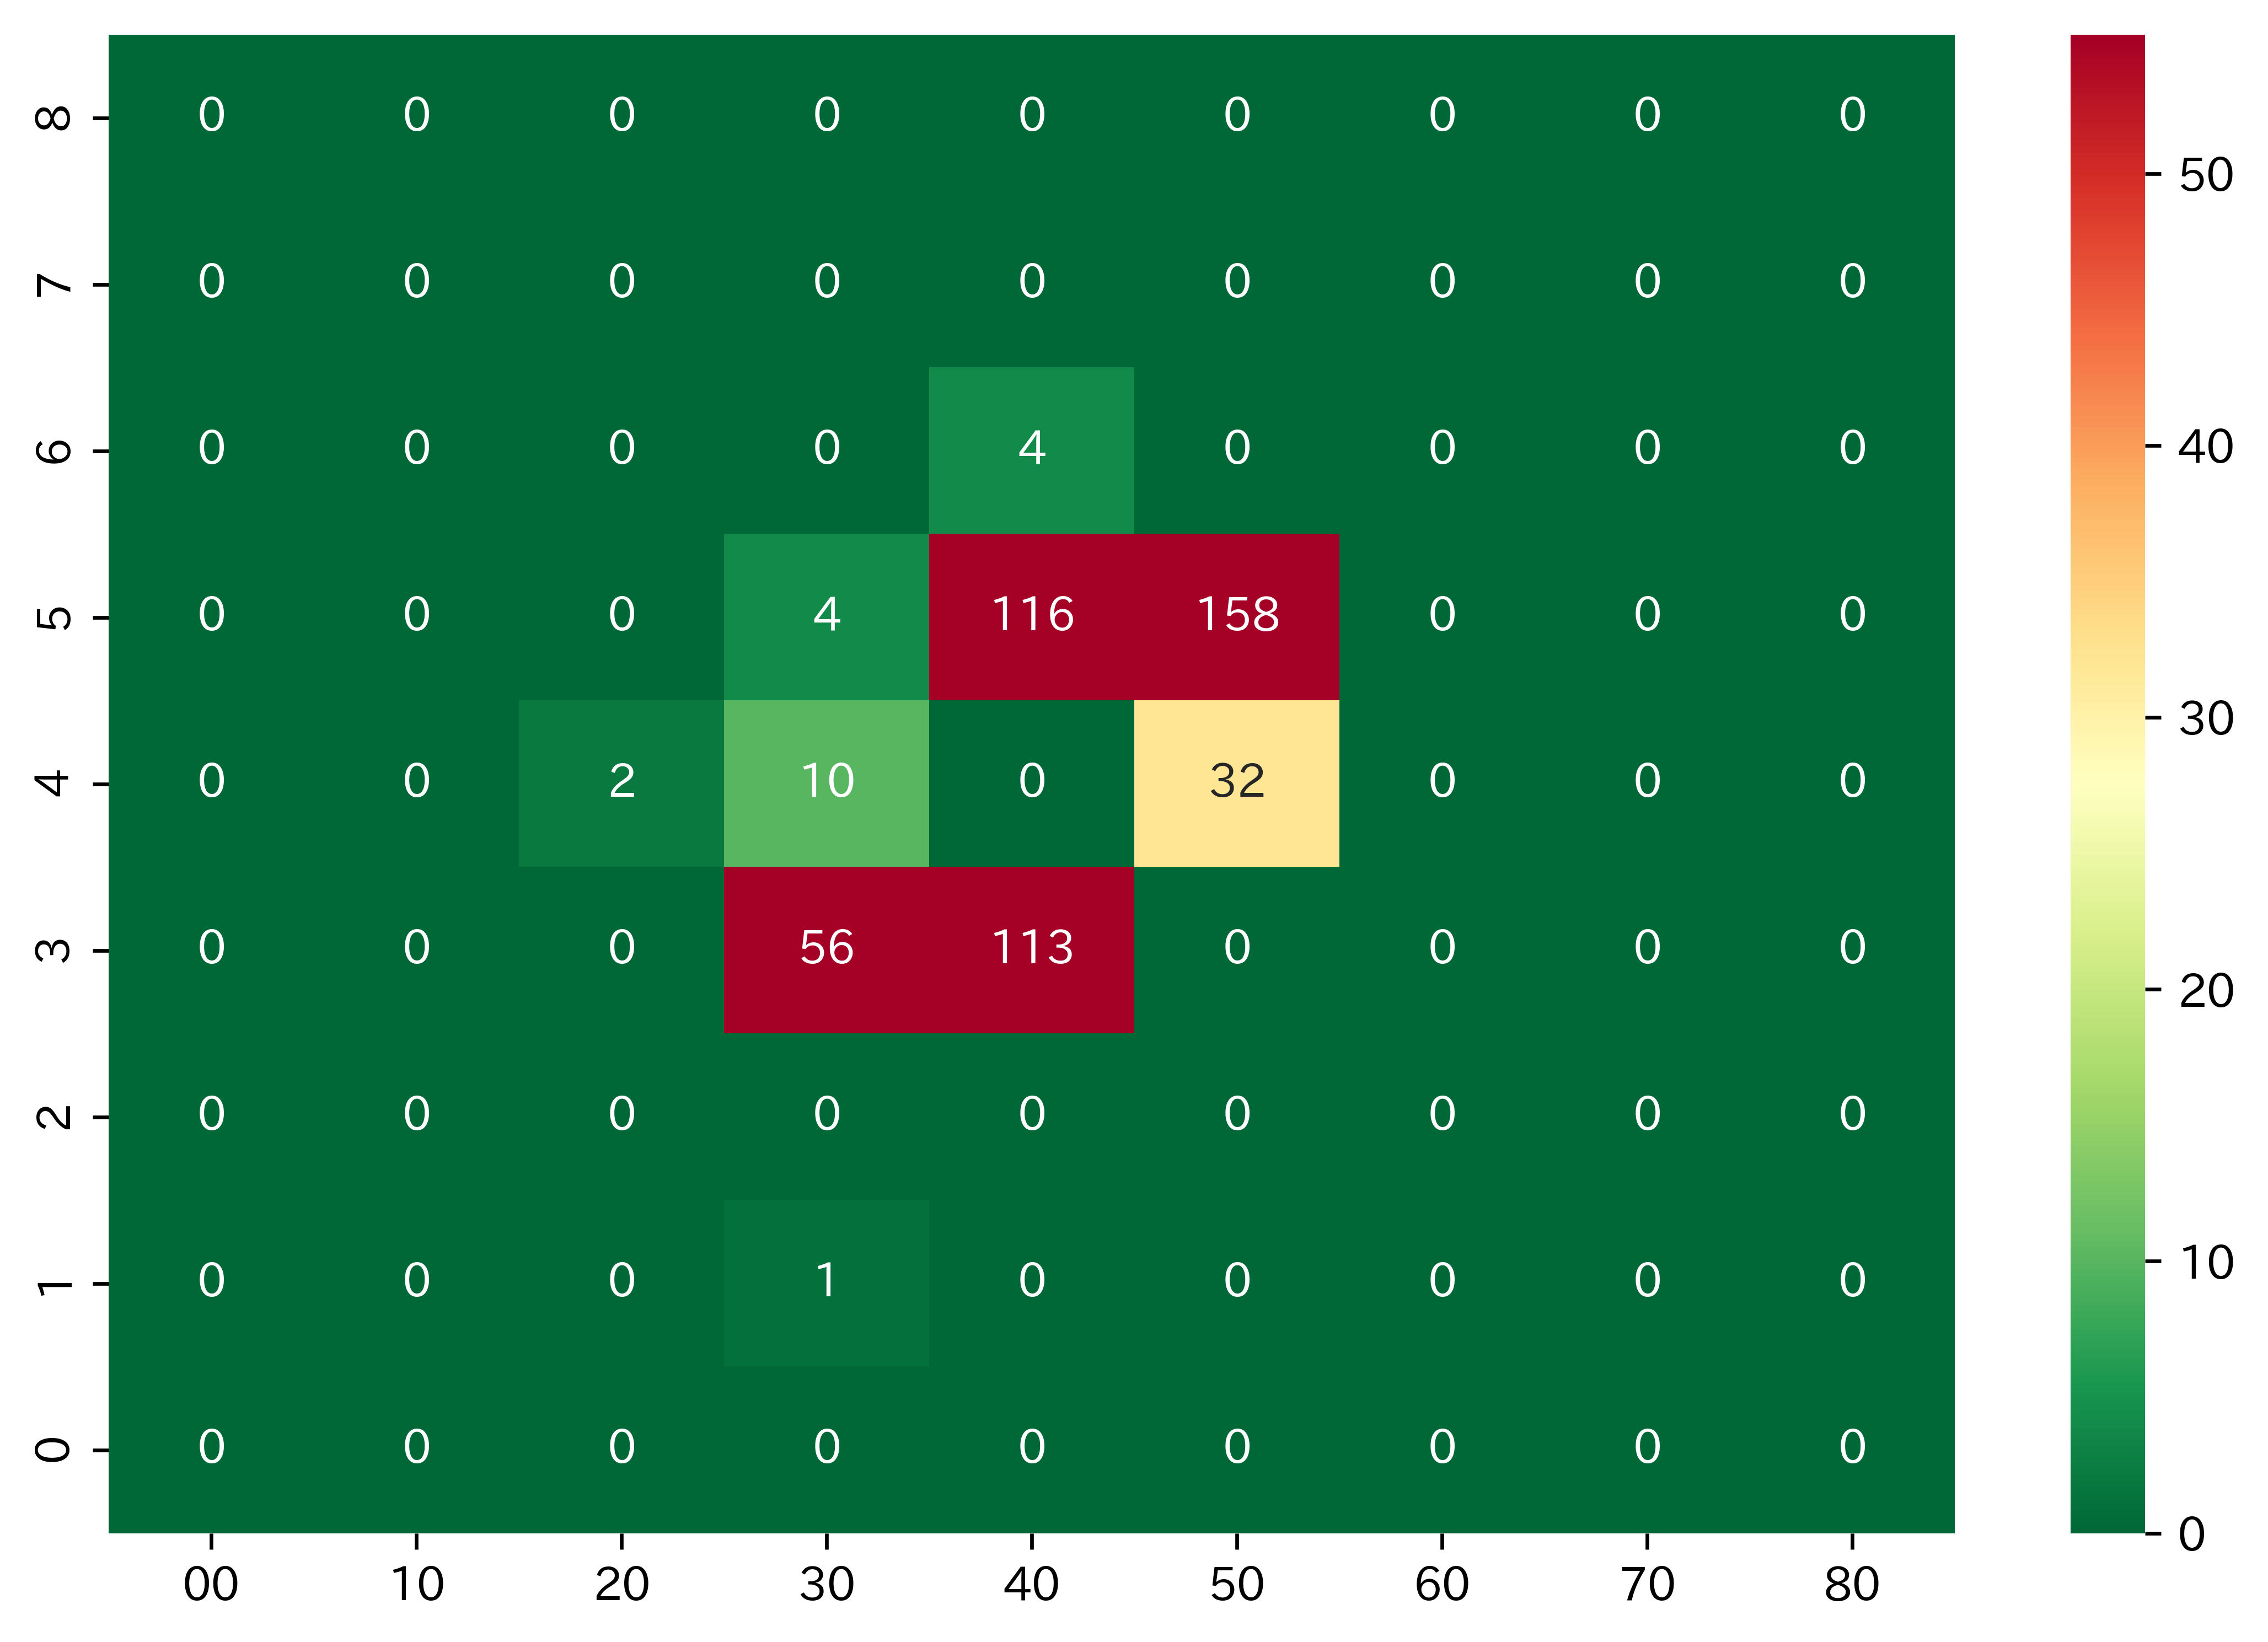

In [34]:
def create_contour(file_name=False):
    df = csv_array[people][ratio][seed]['od']['440'].copy()
    
    plt.figure(figsize=(9,6))
    if file_name:
        plt.figure(figsize=(9,6), dpi=600)
        
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)
    if file_name:
        plt.savefig('{0}.png'.format(file_name))
        
    print(df.sum().sum())
    
area='40'
create_contour(people+ratio+seed+'_'+'od'+area)

In [35]:
area = df_area_sum.iloc[0, 0]
print('エリア: ' + area + '\n')
create_all_counter(area)

エリア: 440

35.0
736.0
496.0


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 648x432 with 0 Axes>

In [ ]:
area = df_area_sum.iloc[1, 0]
print('エリア: ' + area + '\n')
create_all_counter(area)

In [ ]:
area = df_area_sum.iloc[2, 0]
print('エリア: ' + area + '\n')
create_all_counter(area)

In [ ]:
# def create_contour_diff(df):
#     plt.figure(figsize=(9,6))
#     sns.heatmap(df, annot=True, fmt='.3f', cmap='RdYlGn_r',
#                vmax=df.sum().mean())

In [ ]:
# def create_diff_counter(area):
#     taget = csv_array[people][ratio][seed][csv][area].copy()
#     od = csv_array[people][ratio][seed]['od'][area].copy()
    
#     diff_target = target / od
#     diff_od = od / target
    
#     diff_target = diff_target.replace(np.inf,np.nan).fillna(0)
#     diff_od = diff_od.replace(np.inf,np.nan).fillna(0)
    
#     create_contour_diff(diff_target)
#     create_contour_diff(diff_od)

In [ ]:
# area = df_area_sum.iloc[0, 0]
# print('エリア: ' + area + '\n')
# create_diff_counter(area)

In [ ]:
# area = df_area_sum.iloc[1, 0]
# print('エリア: ' + area + '\n')
# create_diff_counter(area)

In [ ]:
# area = df_area_sum.iloc[2, 0]
# print('エリア: ' + area + '\n')
# create_diff_counter(area)